<a href="https://colab.research.google.com/github/munieshwarevakattu/CMPE257-FALL23-MUNIESHWAR-EVAKATTU/blob/Homework-1/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


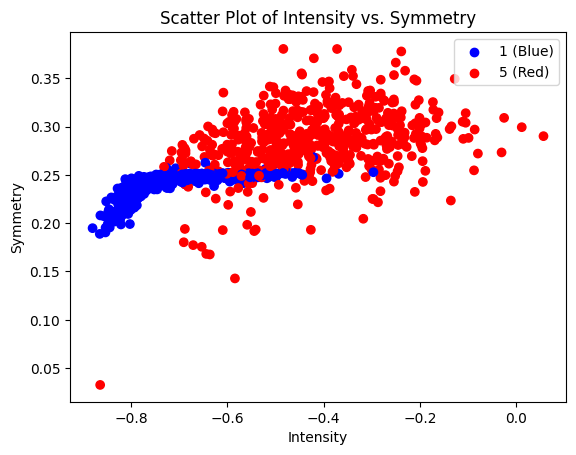

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


digits = pd.read_csv('//content/drive/MyDrive/data/ZipDigits (2).train', header=None, delim_whitespace=True)
digits = digits[(digits[0] == 1) | (digits[0] == 5)]
digits= digits.reset_index(drop=True)
digits[0] = digits[0].apply(lambda x: 1 if x == 1 else -1)

def intensity_feat(image):
    return np.mean(image[1:])

def symmetry_feat(image):
    pixel_values = image[1:].values
    pixel_diff = np.diff(pixel_values)
    symmetry_score = np.sum(np.abs(pixel_diff)) / (len(pixel_values) - 1)
    return symmetry_score

digits['Intensity'] = digits.apply(intensity_feat, axis=1)
digits['Symmetry'] = digits.apply(symmetry_feat, axis=1)

colors = digits[0].map({1: 'blue', -1: 'red'})
plt.scatter(digits['Intensity'], digits['Symmetry'], c=colors, marker='o')
plt.xlabel('Intensity')
plt.ylabel('Symmetry')
legend_labels = ['1 (Blue)', '5 (Red)']
for color, label in zip(['blue', 'red'], legend_labels):
    plt.scatter([], [], c=color, label=label)
plt.legend(loc='upper right')
plt.title('Scatter Plot of Intensity vs. Symmetry')
plt.show()
